In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [190]:
# Reading dataset
df = pd.read_csv(r"Medical Price Dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [191]:
# Checking shape 
df.shape

(1338, 7)

In [192]:
# Check presence of Nulls
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [193]:
# Data-type check
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [194]:
# Checking number of categories in each categorical variable
df_categorical = df.select_dtypes(include=["object"])
for i in df_categorical.columns:
  print("Column Name : ",i)
  print(df[i].value_counts())

Column Name :  sex
male      676
female    662
Name: sex, dtype: int64
Column Name :  smoker
no     1064
yes     274
Name: smoker, dtype: int64
Column Name :  region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


## data preprocessing

In [195]:
# Encoding Nominal Categorical variables
# One-Hot encoding

# Age column
df_sex = pd.get_dummies(df.sex)

# smoker column
df_smoker = pd.get_dummies(df.smoker)
df_smoker = df_smoker.rename(columns={'no':'smoker_no','yes':'smoker_yes'})

# region column
df_region = pd.get_dummies(df.region)

# attaching back to original dataframe
df = pd.concat([df,df_sex,df_smoker,df_region], axis=1)

# Dummy variable trap



df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [196]:
df.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
female          uint8
male            uint8
smoker_no       uint8
smoker_yes      uint8
northeast       uint8
northwest       uint8
southeast       uint8
southwest       uint8
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50e9304590>,
      dtype=object)

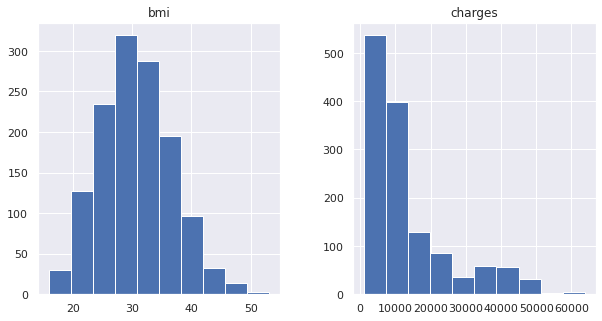

In [197]:
df_numerical = df.select_dtypes(include=["float"])
df_numerical.hist(figsize=(10,5))

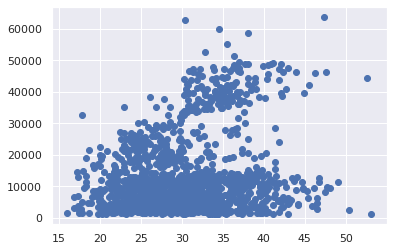

In [198]:
plt.scatter(y=df.charges, x=df.bmi)

In [199]:
df_numerical = df.select_dtypes(include=["int","float"])
df_corr = df_numerical.corr()
df_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


([<matplotlib.axis.YTick at 0x7f50e9194250>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'bmi'),
  Text(0, 0, 'children'),
  Text(0, 0, 'charges')])

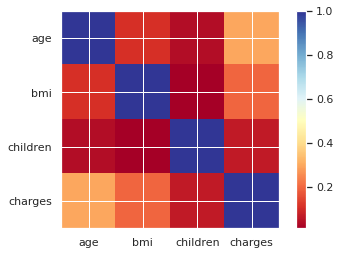

In [200]:
# Heat Map for visualizing Correlation among variables
plt.imshow(df_corr, cmap ="RdYlBu")
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns)
plt.yticks(range(len(df_corr)), df_corr.index)

In [201]:
# INFERENCE - independent variables are not correlated among others - so no multicollinearity exists

## model training

In [202]:
class multipleLinearRegression():

  def __init__(self):
    #No instance Variables required
    pass

  def forward(self,X,y,W):
    
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Loss = Squared Error, we introduce 1/2 for ease in the calculation
    return loss, y_pred

  def updateWeights(self,X,y_pred,y_true,W,alpha,index):
    
    for i in range(X.shape[1]):
      #alpha = learning rate, rest of the RHS is derivative of loss function
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W

  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    
    num_rows = X.shape[0] #Number of Rows
    num_cols = X.shape[1] #Number of Columns 
    W = np.random.randn(1,num_cols) / np.sqrt(num_rows) #Weight Initialization

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.forward(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.updateWeights(X,y_pred,y,W[0],alpha,i)
      train_loss.append(cost)
      num_epochs.append(j)
    return W[0], train_loss, num_epochs

  def test(self, X_test, y_test, W_trained):
    
    test_pred = []
    test_loss = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
        test_pred.append(y_test_pred)
        test_loss.append(loss)
    return test_pred, test_loss
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
    
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

In [203]:
regressor = multipleLinearRegression()

In [204]:
df = df.drop(['sex','region','smoker'], axis=1)
df.head()

,age,bmi,children,charges,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [205]:
# Split Train and Test dataset for validating Machine Learning model
y = df.charges
x = df.drop('charges', axis=1)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state = 42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1070, 11), (268, 11), (1070,), (268,))

In [206]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [207]:
#Training 
W_trained, train_loss, num_epochs = regressor.train(train_x, train_y, epochs=200, alpha=0.0001)

#Testing on the Test Dataset
test_pred, test_loss = regressor.test(test_x, test_y, W_trained)

In [208]:
# Mean Square Error on Test dataset
np.square(np.subtract(test_y,test_pred)).mean()

2218005501609.263

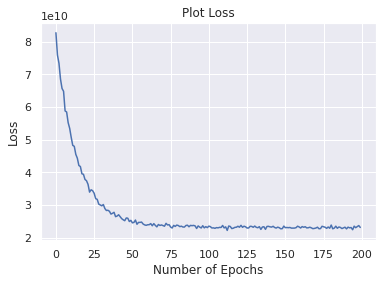

In [209]:
#Plot the Train Loss
regressor.plotLoss(train_loss, num_epochs)